In [1]:
# https://cdsarc.cds.unistra.fr/viz-bin/ReadMe/J/A+A/587/A65?format=html&tex=true

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.io import fits
import astropy.units as u

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

Text(0, 0.5, 'Relative Flux')

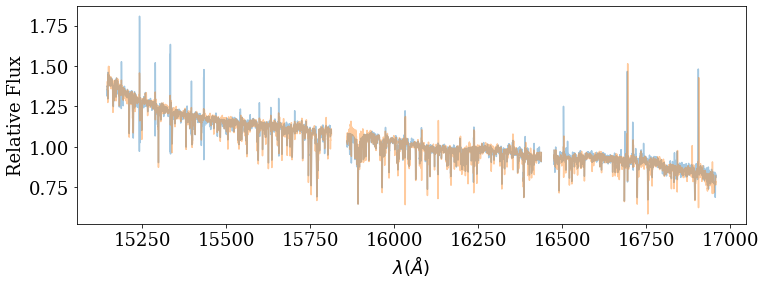

In [4]:
# hdul = fits.open('apStar-dr17-2M00030035+1554160.fits')
hdul = fits.open('apStar-dr17-2M00061847+1539108.fits')
# spectra are in the 1st extension
sp = hdul[1].data

# reconstruct the wavelength axis from the header - NOTE: doesn't work for apVisit files!
wave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(sp.shape[1])))


hdul = fits.open('apStar-dr17-2M00030035+1554160.fits')
sp2 = hdul[1].data
wave2 = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(sp2.shape[1])))

plt.figure(figsize=(12,4))
plt.plot(wave, sp[0]/np.nanmedian(sp[0]), alpha=0.4)
plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.4)

plt.xlabel('$\lambda (\AA)$')
# plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.ylabel('Relative Flux')

In [5]:
atl = pd.read_table('spnir.dat', delim_whitespace=True, names=('wave','nflux','rflux'))

(15100.0, 17000.0)

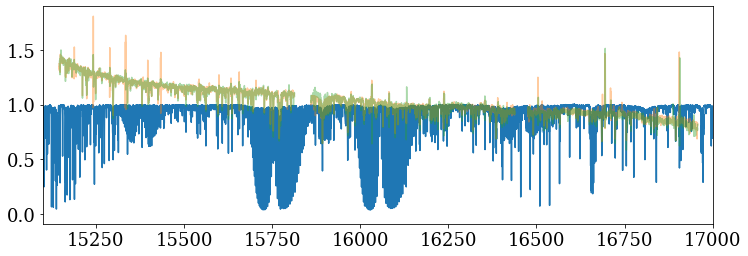

In [6]:
plt.figure(figsize=(12,4))

plt.plot((1/(atl['wave'].values / u.cm)).to(u.angstrom), atl['nflux'])

plt.plot(wave, sp[0]/np.nanmedian(sp[0]), alpha=0.4)
plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.4)

plt.xlim(15100,17000)


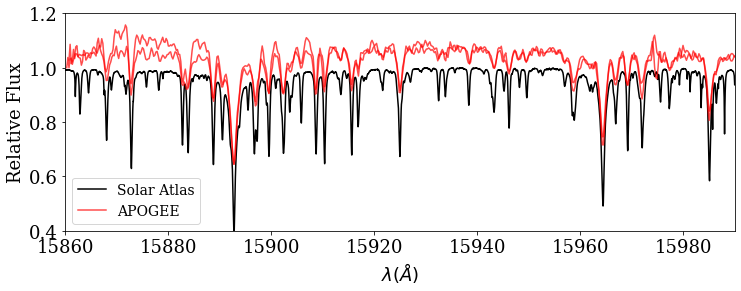

In [7]:
plt.figure(figsize=(12,4))

plt.plot((1/(atl['wave'].values / u.cm)).to(u.angstrom), atl['nflux'],c='k', 
         label='Solar Atlas')

plt.plot(wave, sp[0]/np.nanmedian(sp[0]), alpha=0.7, c='r', label='APOGEE')
plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.7,c='r')
plt.legend(fontsize=14)

plt.xlim(15860,15990)
plt.ylim(0.4,1.2)
plt.xlabel('$\lambda (\AA)$')
# plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.ylabel('Relative Flux')
plt.savefig('atlas1.png',dpi=150,bbox_inches='tight')

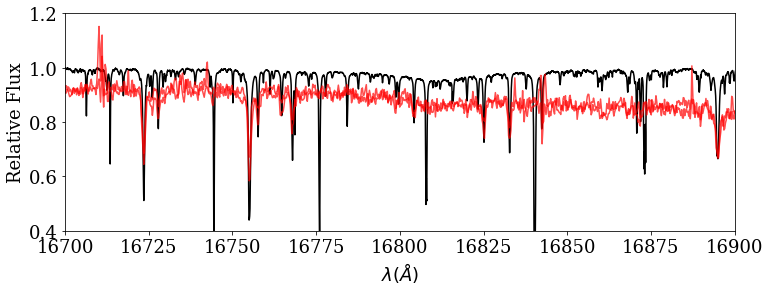

In [8]:
plt.figure(figsize=(12,4))

plt.plot((1/(atl['wave'].values / u.cm)).to(u.angstrom), atl['nflux'],c='k', 
         label='Solar Atlas')

plt.plot(wave, sp[0]/np.nanmedian(sp[0]), alpha=0.7, c='r', label='APOGEE')
plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.7,c='r')
# plt.legend(fontsize=14)

plt.xlim(16700,16900)
plt.ylim(0.4,1.2)
plt.xlabel('$\lambda (\AA)$')
# plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.ylabel('Relative Flux')
plt.savefig('atlas2.png',dpi=150,bbox_inches='tight')

In [9]:
Awave = (1/(atl['wave'].values / u.cm)).to(u.angstrom).value
Aflux = atl['nflux'].values
Asort = np.argsort(Awave)

In [10]:
atl_w = wave2
atl_f = np.interp(atl_w, Awave[Asort], Aflux[Asort])

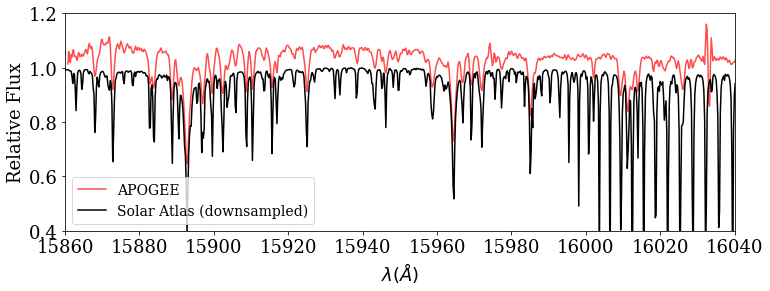

In [11]:
plt.figure(figsize=(12,4))

plt.plot(wave, (sp[0]/np.nanmedian(sp[0]) + sp2[0]/np.nanmedian(sp2[0]))/2, alpha=0.7, c='r', label='APOGEE')
# plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.7,c='r')
plt.plot(atl_w, atl_f, c='k', label='Solar Atlas (downsampled)')
plt.legend(fontsize=14)

plt.xlim(15860,16040)
plt.ylim(0.4,1.2)
plt.xlabel('$\lambda (\AA)$')
# plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.ylabel('Relative Flux')
plt.savefig('atlas3.png',dpi=150,bbox_inches='tight')

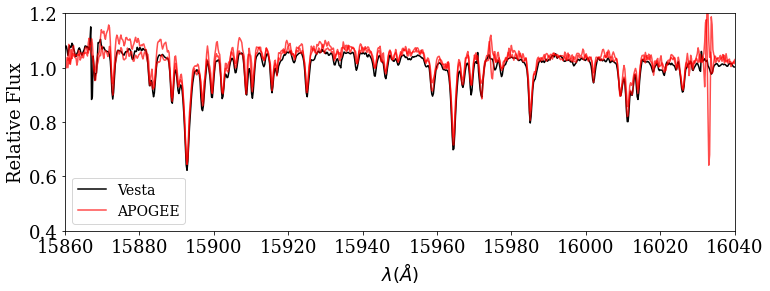

In [41]:
# APOGEE took a spectrum of the "Sun" via Vesta w/ the NMSU 1-m

hdul = fits.open('apStar-dr17-VESTA.fits')
Vesta = hdul[1].data
Vwave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(Vesta.shape[1])))

###
plt.figure(figsize=(12,4))

# plt.plot((1/(atl['wave'].values / u.cm)).to(u.angstrom), atl['nflux'],c='k', 
#          label='Solar Atlas')

plt.plot(Vwave, Vesta[0], c='k', label='Vesta')
plt.plot(wave, sp[0]/np.nanmedian(sp[0]), alpha=0.7, c='r', label='APOGEE')
plt.plot(wave2, sp2[0]/np.nanmedian(sp2[0]), alpha=0.7,c='r')
plt.legend(fontsize=14)

plt.xlim(15860,16040)
plt.ylim(0.4,1.2)
plt.xlabel('$\lambda (\AA)$')
# plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.ylabel('Relative Flux')
plt.savefig('atlas_vesta.png',dpi=150,bbox_inches='tight')

In [14]:
Vesta.shape

(4, 8575)

In [24]:
hdul.info()

Filename: apStar-dr17-VESTA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     110   ()      
  1                1 ImageHDU        12   (8575, 4)   float64   
  2                1 ImageHDU        12   (8575, 4)   float64   
  3                1 ImageHDU        12   (8575, 4)   int64   
  4                1 ImageHDU        12   (8575, 4)   float64   
  5                1 ImageHDU        12   (8575, 4)   float64   
  6                1 ImageHDU        12   (8575, 4)   float64   
  7                1 ImageHDU        12   (8575, 4)   float64   
  8                1 ImageHDU         5   ()      
  9                1 BinTableHDU     58   2R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 765D, 765D, 765D, D, D, D, D, D, 765D]   
 10                1 BinTableHDU     58   1R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 243D, 243D, 243D, D, D, D, D, D, 243D]   


(0.9, 1.5)

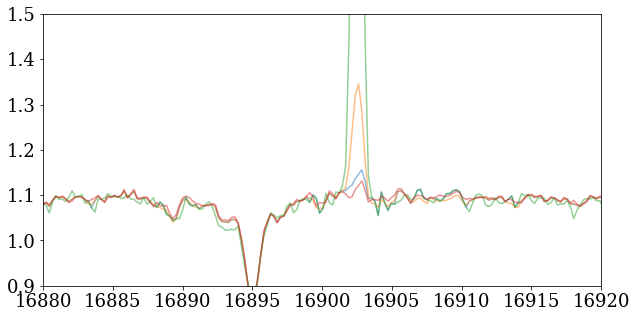

In [25]:
plt.figure(figsize=(10,5))
plt.plot(Vwave, hdul[1].data[0], alpha=0.5)
plt.plot(Vwave, hdul[1].data[1], alpha=0.5)
plt.plot(Vwave, hdul[1].data[2], alpha=0.5)
plt.plot(Vwave, hdul[1].data[3], alpha=0.5)
plt.xlim(16880,16920)
plt.ylim(.9,1.5)

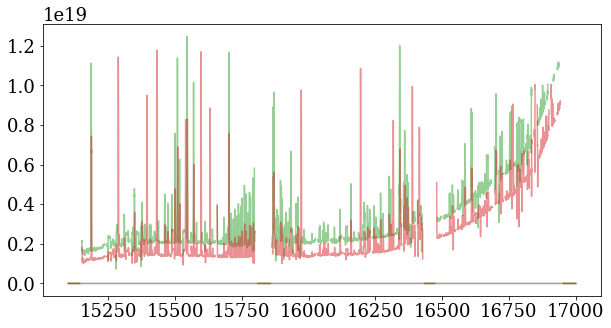

In [35]:
# data model
# https://data.sdss.org/datamodel/files/APOGEE_REDUX/APRED_VERS/visit/TELESCOPE/FIELD/PLATE_ID/MJD5/apVisit.html

plt.figure(figsize=(10,5))
plt.plot(Vwave, hdul[5].data[0], alpha=0.5)
plt.plot(Vwave, hdul[5].data[1], alpha=0.5)
plt.plot(Vwave, hdul[5].data[2], alpha=0.5)
plt.plot(Vwave, hdul[5].data[3], alpha=0.5)

